Ex. 1:

Un site web doreşte să prezică rata zilnică p a utilizatorilor care finalizează o achiziţie. Se observă date zilnice privind
numărul k de utilizatori care finalizează achiziţia şi numărul total n de vizitatori zilnici (astfel, p = k/n), timp de o
săptămână. Observaţiile sunt:
● Ziua 1: k = 10, n = 100;
● Ziua 2: k = 15, n = 120;
● Ziua 3: k = 20, n = 150;
● Ziua 4: k = 5, n = 90;
● Ziua 5: k = 25, n = 200;
● Ziua 6: k = 12, n = 110;
● Ziua 7: k = 18, n = 130.
Dorim să estimăm rata pentru fiecare zi a săptămânii, dar şi rata medie. Presupunem că:
● rata zilnică p urmează o distribuţie Beta(α = 2, β = 2), care reflectă o preferinţă uşoară pentru valori apropiate
de 0.5, iar
● pentru fiecare zi, numărul de utilizatori care finalizează achiziţia ki este modelat ca o variabilă binomială:

ki ∼ Binomial(ni, pi),

unde ni este numărul total de utilizatori în ziua i.

a) Definiţi un model în PyMC care sa descrie contextul de mai sus.
b) Estimaţi distribuţia a posteriori pentru fiecare pi

, dar şi pentru rata medie globală pmean =1 7
(p1 + . . . + p7).

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


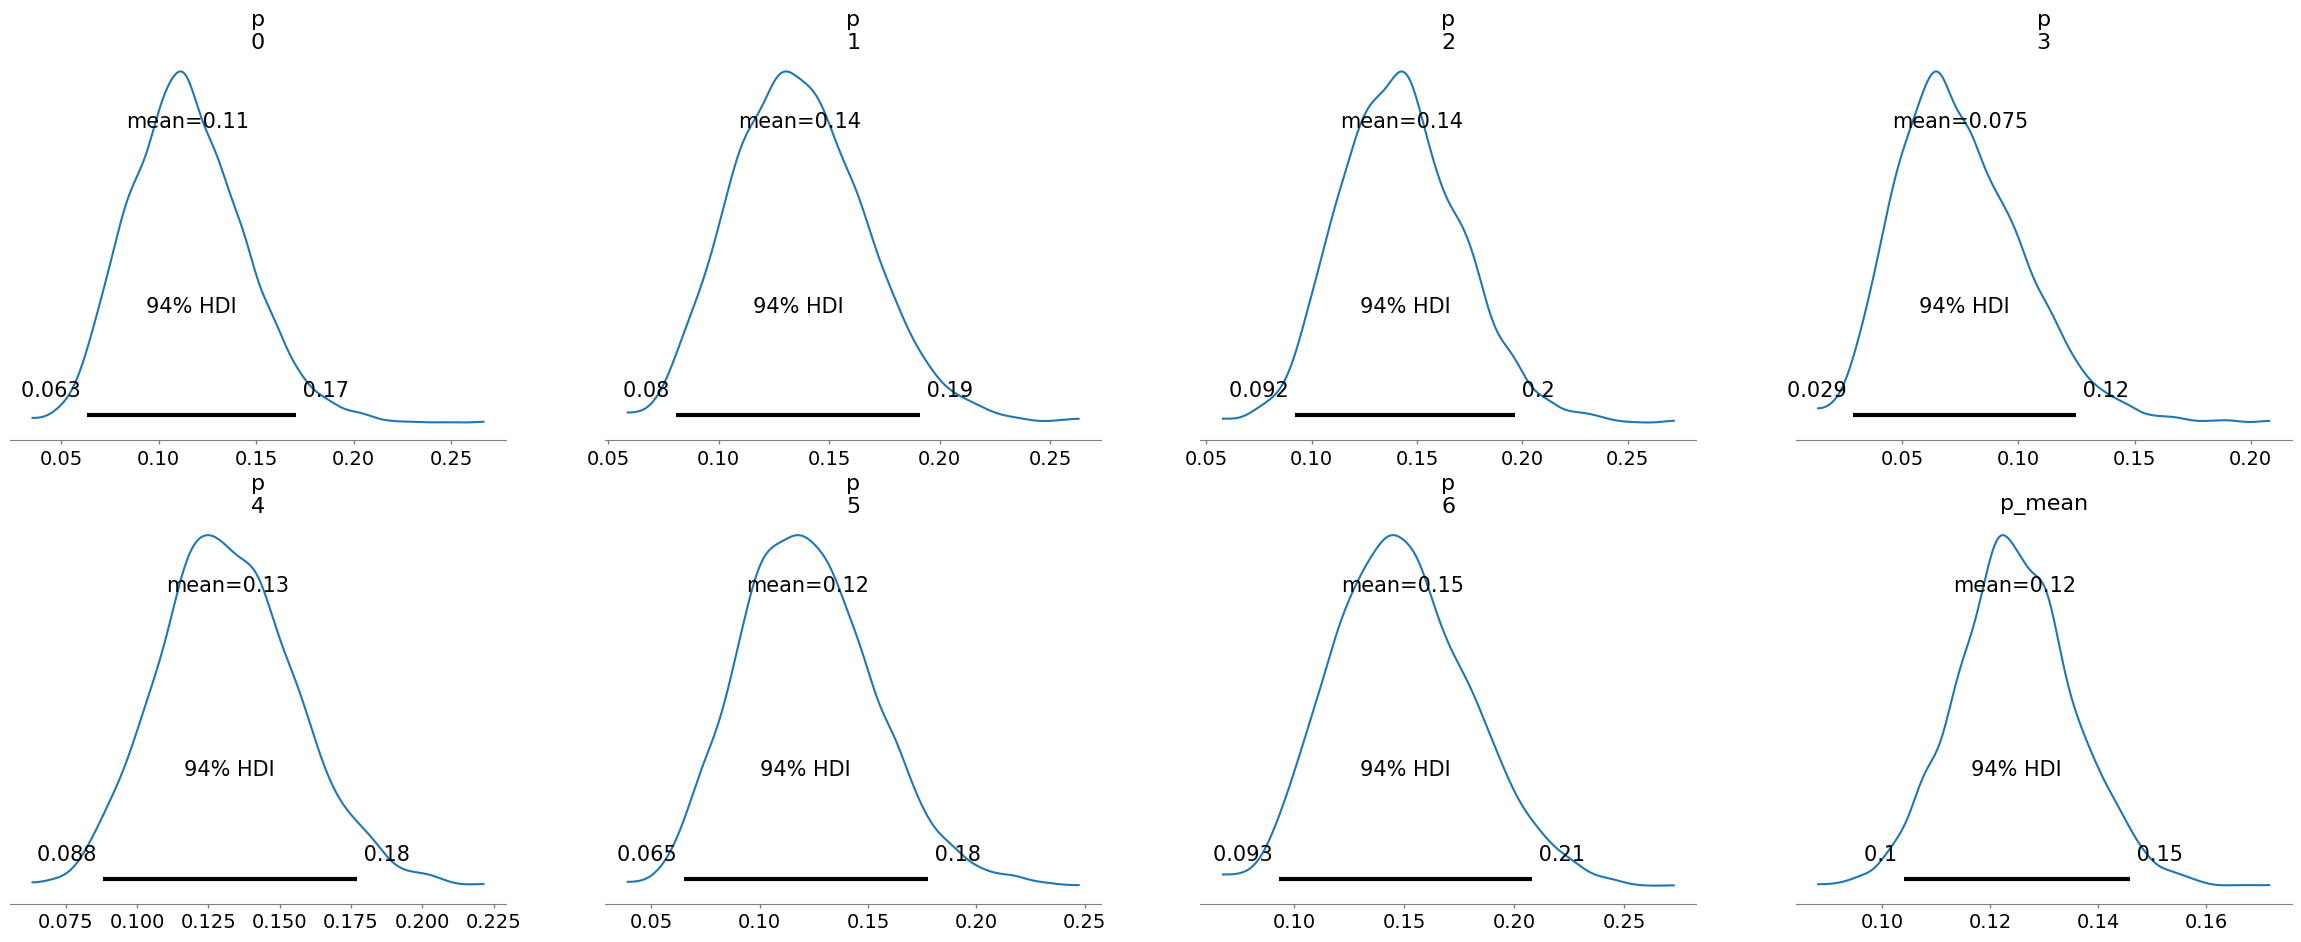

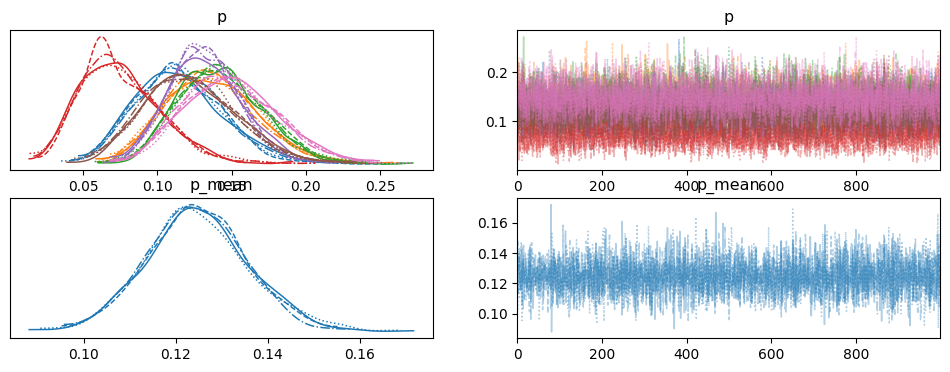

In [4]:
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

def ex1():

    observed_k = [10, 15, 20, 5, 25, 12, 18]
    observed_n = [100, 120, 150, 90, 200, 110, 130]

    with pm.Model() as site_model:
        p = pm.Beta('p', alpha=2, beta=2, shape=7)

        k = pm.Binomial('k', n=observed_n, p=p, observed=observed_k)

        p_mean = pm.Deterministic('p_mean', pm.math.mean(p))

        trace = pm.sample(1000, return_inferencedata=True)

    az.plot_posterior(trace)
    plt.show()

    az.plot_trace(trace, var_names=['p', 'p_mean'])
    plt.show()

ex1()